In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [5]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 KB 3.6 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=acc3b411b6c7208713082ed31c634af849b65d9b6c855ae0b45b3af0388c08fc
  Stored in directory: /root/.cache/pip/wheels/c9/a5/cc/cb20f1314d4cdec0001fd72baa1efe93e1542a81bdea2fc639
Successfully built libarchive


In [8]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 52.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 97.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113645 sha256=b0d45c06f0a03d9b165adf2a958c2a3c785b83a9db4faee630286df85e4c6990
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

ModuleNotFoundError: ignored

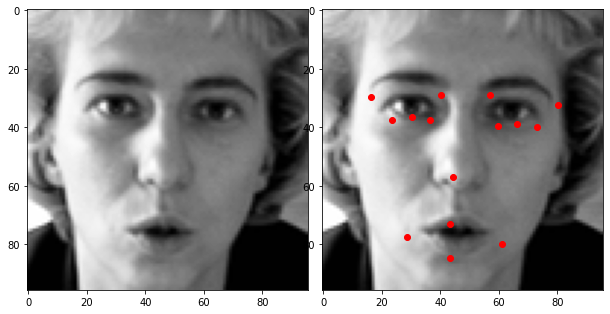

In [12]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import zipfile

# Set file paths:This code sets the paths for the zip files containing the training and testing data, the file containing the lookup table for the output, and a sample submission file.
train_zip_path = "/content/training.zip"
test_zip_path = "/content/test.zip"
id_lookup_table_path = "/content/IdLookupTable.csv"
sample_submission_path = "/content/SampleSubmission.csv"
# Extract data from zip files into separate folders named "train_data" and "test_data".
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall('train_data')
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall('test_data')

# Load data into dataframes: This code reads the CSV files in the "train_data" and "test_data" folders into Pandas dataframes, and reads the lookup table and sample submission files into dataframes as well.
train_df = pd.read_csv('train_data/training.csv')
test_df = pd.read_csv('test_data/test.csv')
id_lookup_table = pd.read_csv(id_lookup_table_path)
sample_submission = pd.read_csv(sample_submission_path)

# Print information about train_df
print(train_df.info())

#Fill the Nan values and Separate and reshape input values(x_train): This code fills the missing values in the "train_df" dataframe using forward fill (i.e., copying the last valid value to fill the missing values).

train_df.fillna(method='ffill',inplace=True)

#Separate and reshape input values(x_train) in the training dataset :
#This code extracts the "Image" column from the "train_df" dataframe into a separate dataframe called "image_df", then converts the pixel values into an array of floats. The array is then reshaped into a 4-dimensional array of size (number of examples, 96, 96, 1), where the last dimension corresponds to the number of channels (in this case, 1 since the images are grayscale). The resulting array is stored in "x_train", and its shape is printed.
image_df = train_df['Image']
imageArr = []
for i in range(0,len(image_df)):
     img = image_df[i].split()
     img = ['0' if x == '' else x for x in img]
     imageArr.append(img)
#The pixel values for each image are stored in the imageArr list, and they are converted to a numpy array and reshaped to be a 4-dimensional array with shape (number of images, height, width, channels). The channels dimension is set to 1 because the images are grayscale. The shape of the resulting x_train array is printed.
x_train = np.array(imageArr,dtype='float')
x_train = x_train.reshape(-1,96,96,1)
print(x_train.shape)

#Create a CNN that takes pictures as input and outputs key points: This code creates a new dataframe called "keypoints_df" by dropping the "Image" column from the "train_df" dataframe. The remaining columns correspond to the key point coordinates. These coordinates are converted to an array of floats and stored in "y_train". The shape of this array is printed.
keypoints_df = train_df.drop('Image',axis = 1)
y_train = np.array(keypoints_df,dtype='float')
print(y_train.shape)

#This function takes an index as input and displays the corresponding image from the x_train array using matplotlib's imshow() method. The image is reshaped to its original dimensions, and the colormap is set to grayscale. The function then plots red circles at the key point coordinates from the corresponding row of the y_train array.
def visualizeWithNoKeypoints(index):
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')
def visualizeWithKeypoints(index):
    plt.imshow(x_train[index].reshape(96,96),cmap='gray')
    for i in range(1,31,2):
        plt.plot(y_train[0][i-1],y_train[0][i],'ro')

#After we have written the visualize function and next, we can visualize each image using the function call
#This code creates a figure that contains two subplots, one for each visualization function defined above. The first subplot displays the image without keypoints and the second subplot displays the image with keypoints.

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
plt.subplot(1,2,1)
visualizeWithNoKeypoints(1)
plt.subplot(1,2,2)
visualizeWithKeypoints(1)

#The data has been preprocessed. To create our CNN model, we’ll utilize the Keras framework.

from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D,MaxPooling2D,BatchNormalization, Flatten, Dense, Dropout
#!pip install keras --upgrade
from keras.layers.advanced.activations import LeakyReLU

model = Sequential()

model.add(Convolution2D(32,(3,3),padding='same',use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3),padding='same',use_bias = False))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))

model.add(BatchNormalization())

model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(BatchNormalization())
model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))

model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

#The next step is to configure the model :

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae','acc'])
model.fit(x_train,y_train,batch_size=256,epochs=45,validation_split=2.0)
#A total number of 50 iterations were performed in the whole training dataset.

#To put the model to the test using our data collection, we must first prepare our test set.

# test_df.isnull().any()

#x test: Separate and reshape input test values

# image_df = test_df['Image']
# keypoints_df = test_df.drop('Image',axis = 1)
# imageArr = []

# for i in range(0,len(image_df)):
#     img = image_df[i].split()
    #img = ['0' if x=='' else x for <a onclick="parent.postMessage({'referent':'.kaggle.usercode.9109824.32742593.[5124,5127].x'}, '*')">x in img]
    # imageArr.append(img)
#x_test = np.<a onclick="parent.postMessage({'referent':'.numpy.array'}, '*')">array(imageArr,dtype='float')
# x_test = x_test.reshape(-1,96,96,1)
# print(x_test.shape)

#We're now going to separate target values (y_test) in the test data set

#y_test = np.<a onclick="parent.postMessage({'referent':'.numpy.array'}, '*')">array(keypoints_df,dtype='float')
# print(y_test.shape)

#Now, it’s time to predict the results of the trained model;

# pred = model.predict(x_test)
# idLookupTable.head()

import tensorflow as tf
import os
import pandas as pd
import numpy as np
from dataset import get_data
from utils import evaluation_keypoints_plot, test_keypoints_plot
from tqdm import tqdm
# Create directory to save validation results.
validation_result_path = os.path.join('..', 'outputs', 'validation_results')
os.makedirs(os.path.join(validation_result_path), exist_ok=True)
# Create directory to save test results.
test_result_path = os.path.join('..', 'outputs', 'test_results')
os.makedirs(os.path.join(test_result_path), exist_ok=True)
model = tf.keras.models.load_model('../outputs/saved_model')
print(model.summary())
_, valid_ds = get_data()

def evaluate(valid_ds):
    # Get the results.
    results = model.predict(valid_ds)
    # Loop over the validation set and save the 
    # images and corresponding result plot to disk.
    counter = 0
    for i, batch in tqdm(enumerate(valid_ds), total=len(valid_ds)):
        for j, (image, keypoints) in enumerate(zip(batch[0], batch[1])):
            evaluation_keypoints_plot(
                image, results[counter], keypoints,
                save_path=os.path.join(validation_result_path, str(counter)+'.png')
            )
            counter += 1

def test(test_csv_path):

#Function to predict on all images present in `test.csv` file

    test_df = pd.read_csv(test_csv_path)
    images = test_df.Image
    for i in tqdm(range(len(images)), total=len(images)):
        image = images.iloc[i].split(' ')
        image = np.array(image, dtype=np.float32) / 255.
        image = image.reshape(96, 96)
        image = image.reshape(96, 96, 1)
        image_batch = np.expand_dims(image, axis=0)
        image_tensor = tf.convert_to_tensor(image_batch)
        outputs = model.predict(image_tensor)
        test_keypoints_plot(
            image, outputs, 
            save_path=os.path.join(test_result_path, str(i)+'.png')
        )
print('Evaluating...')
evaluate(valid_ds)
print('Testing...')
test(test_csv_path=os.path.join('..', 'input', 'test.csv'))